In [1]:
# import 
import matplotlib.pyplot as plt
import os

import torch
import numpy as np
import pandas as pd

from genEM3.data import transforms, annotation
from genEM3.data.wkwdata import WkwData, DataSplit
from genEM3.model.autoencoder2d import Encoder_4_sampling_bn_1px_deep_convonly_skip, AE_Encoder_Classifier, Classifier3LayeredNoLogSoftmax
from genEM3.training.multiclass import Trainer, subsetWeightedSampler
from genEM3.util.path import get_data_dir, gethostnameTimeString, get_runs_dir


In [2]:
# List of directories in the .log folder
log_dir = os.path.join(get_runs_dir(), 'training','classification_double_binary_v01', '.log')
result_dir_list = os.listdir(log_dir)
print(result_dir_list)

['With_Myelin_Range_Balance_0.2_0.2_GABAG03-02_Feb_2021-19_44_49', 'No_Myelin_Range_Balance_0.2_0.2_GABAG03-29_Jan_2021-00_25_02', 'test_class_balance_run_without_myelin_factor_0.200_0.200_GABAG02-17_Mar_2021-15_08_45', 'With_Myelin_Range_Balance_0.5_0.2_GABAG04-07_Feb_2021-09_34_15', 'No_Myelin_Range_Balance_0.500_0.200_GABAG03-04_Feb_2021-09_52_12']


In [3]:
# Get directory of a specific epoch
epoch = 2025
epoch_root = 'epoch_{:02d}'.format(epoch)
epoch_dir = os.path.join(log_dir, 'With_Myelin_Range_Balance_0.5_0.2_GABAG04-07_Feb_2021-09_34_15', epoch_root)
print(epoch_dir)

/gaba/u/alik/code/genEM3/runs/training/classification_double_binary_v01/.log/With_Myelin_Range_Balance_0.5_0.2_GABAG04-07_Feb_2021-09_34_15/epoch_2025


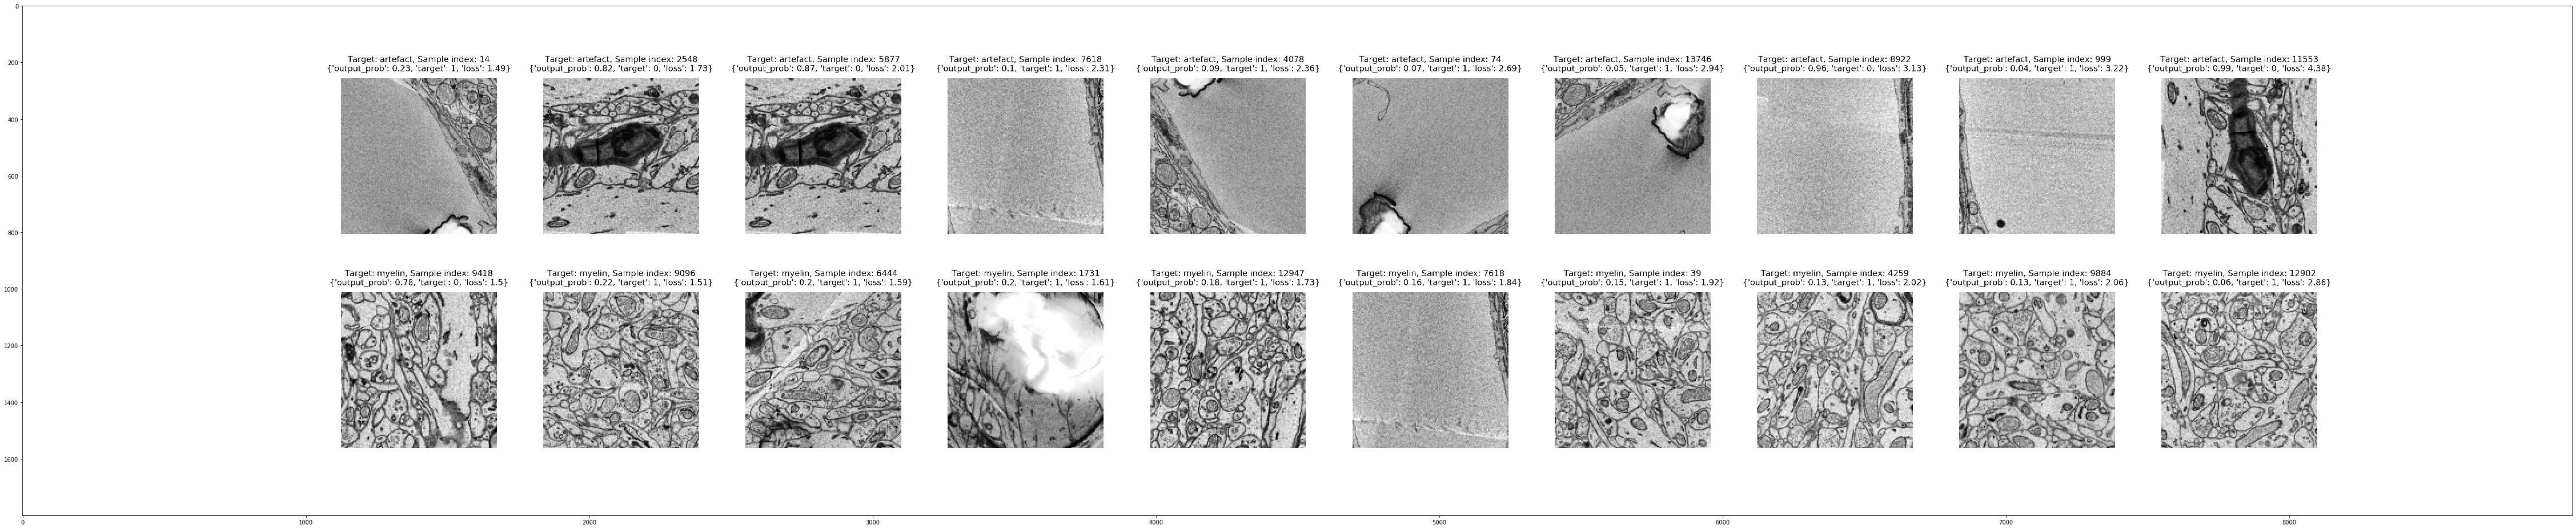

In [4]:
# Load the highest loss images 
img_path = os.path.join(epoch_dir, 'Examples_with_highest_loss_train.png')
img = plt.imread(img_path)
plt.figure(figsize=(80,80))
plt.imshow(img)

In [5]:
# Load the dataset
json_names = ['dense_3X_10_10_2_um/original_merged_double_binary_v01.json', 
              '10x_test_bboxes/10X_9_9_1_um_double_binary_v01.json']
ds_names = [os.path.join(get_data_dir(), j_name) for j_name in json_names]
data_sources = WkwData.concat_datasources(ds_names)
print(len(data_sources))
# run_root = '/gaba/u/alik/code/genEM3/runs/training/classification_double_binary_v01'
input_shape = (140, 140, 1)
output_shape = (140, 140, 1)
cache_RAM = False
cache_HDD = False
batch_size = 1024
num_workers = 8


dataset = WkwData(
    input_shape=input_shape,
    target_shape=output_shape,
    data_sources=data_sources,
    cache_RAM=cache_RAM,
    cache_HDD=cache_HDD)

20087


In [6]:
margin = 35
roi_size = 140
button_names = [['No', 'Yes'], ['No', 'Yes']]
target_classes = ['Myelin', 'Debris']#

source_dict = annotation.patch_source_list_from_dataset(dataset=dataset,
                                                        margin=margin,
                                                        roi_size=roi_size)

# Create the datasets
dataset_dict = dict.fromkeys(source_dict)
for key in source_dict:
    cur_source = source_dict[key]
    cur_patch_shape = tuple(cur_source[0].input_bbox[3:6])
    cache_RAM = True if key == 'large' else False
    cur_config = WkwData.config_wkwdata(datasources_json_path=None,
                                        input_shape=cur_patch_shape,
                                        output_shape=cur_patch_shape,
                                        cache_RAM=cache_RAM)
    dataset_dict[key] = WkwData.init_from_config(cur_config, source_dict[key])


t
Filling caches ... data source 19886/20087 input
Filling caches ... data source 19886/20087 target
Filling caches ... data source 19887/20087 input
Filling caches ... data source 19887/20087 target
Filling caches ... data source 19888/20087 input
Filling caches ... data source 19888/20087 target
Filling caches ... data source 19889/20087 input
Filling caches ... data source 19889/20087 target
Filling caches ... data source 19890/20087 input
Filling caches ... data source 19890/20087 target
Filling caches ... data source 19891/20087 input
Filling caches ... data source 19891/20087 target
Filling caches ... data source 19892/20087 input
Filling caches ... data source 19892/20087 target
Filling caches ... data source 19893/20087 input
Filling caches ... data source 19893/20087 target
Filling caches ... data source 19894/20087 input
Filling caches ... data source 19894/20087 target
Filling caches ... data source 19895/20087 input
Filling caches ... data source 19895/20087 target
Filling 

In [7]:

w = annotation.Widget(dataset=dataset_dict['large'], 
                      index_range=range(len(dataset_dict['large'])),
                      button_names = button_names,
                      target_classes = target_classes,
                      margin=margin, 
                      roi_size = roi_size)
w.update_from_json_dataset()
w.show_widget()

In [8]:
w.update_from_json_dataset()
